task-1
#1.importing libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import math
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


#2.loading the dataset

In [ ]:
df=pd.read_csv("/content/titanic_dataset.csv",index_col="PassengerId",usecols=["PassengerId","Survived","Pclass"])
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull()

In [ ]:
df.info()

In [ ]:
df.describe()

#3.plotting the pclass

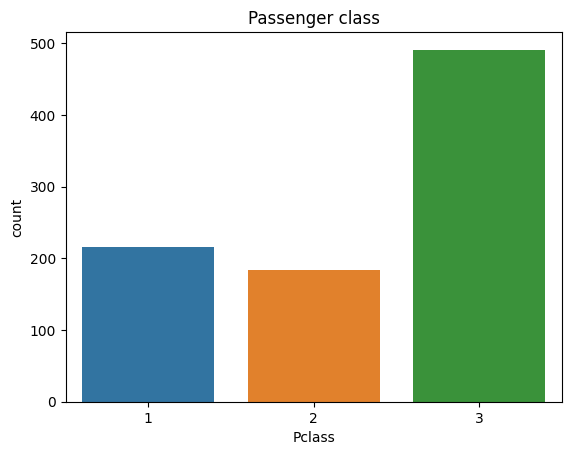

In [ ]:
sns.countplot(data=df,x="Pclass")
plt.title("Passenger class")
plt.show()

#4.plotting the survived or not

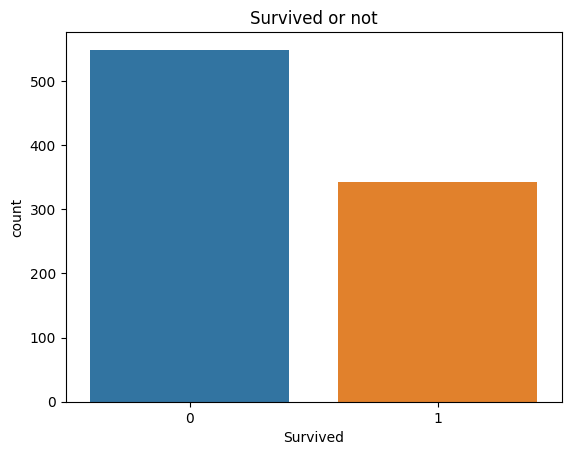

In [ ]:
sns.countplot(data=df,x="Survived")
plt.title("Survived or not")
plt.show()

#5.creating the pivot plot of pclass and survived

In [ ]:
pclass_survived=pd.pivot_table(df,index=["Pclass"],columns=["Survived"],aggfunc="size")
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


#6.stating the null hypotehsis based on the classes

In [ ]:
#we can see that there is 24% of total passengers in class1,20.65% of total passengers in class2 and remaining 55.11% in class3.
#also 61.62% of total passengers survived
#if we have
#null hypothesis:"the survival does not depend on the class the passengers were travelling "

#7.plotting the heatmap of pclass vs survived

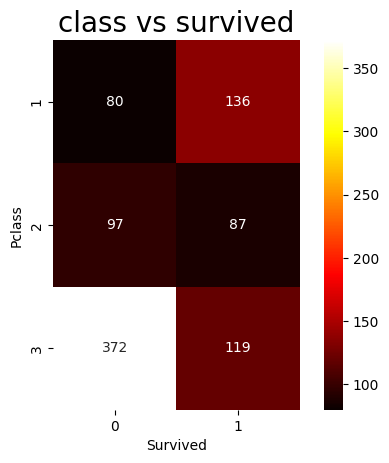

In [ ]:
sns.heatmap(pclass_survived,annot=True,fmt='g',square=True,cmap='hot')
plt.title("class vs survived",fontsize=20)
plt.show()

#8.pclass

In [ ]:
pct_class=pclass_survived.sum(axis=1)/891
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

#9.survived

In [ ]:
pct_survived=pclass_survived.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

In [ ]:
pct_class.to_frame()@(pct_survived.to_frame().T)
#these are the proportion of people expected with null hypothesis

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [ ]:
exp=round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp
#this is the number of people in all classes and survival history expected

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


#10.plotting the heatmap observed and expected

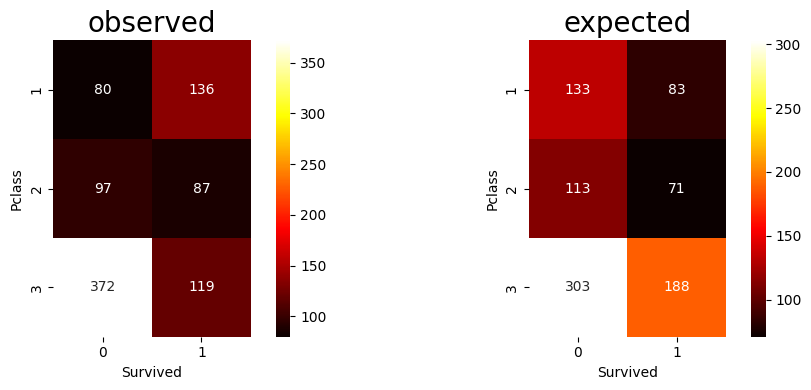

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.heatmap(pclass_survived,annot=True,fmt='g',square=True,cmap="hot")
plt.title("observed",fontsize=20)

plt.subplot(122)
sns.heatmap(exp,annot=True,fmt='g',square=True,cmap='hot')
plt.title("expected",fontsize=20)
plt.tight_layout()

plt.show()

In [ ]:
chi_table=((pclass_survived-exp)**2)/exp
chi_table

Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


In [ ]:
from scipy.stats.distributions import chi2
chi_value=chi_table.sum().sum()
p_value=chi2.sf(chi_value,1)
print("chi square value is :",chi_value)
print("p value is :",p_value)

chi square value is : 101.87213414657131
p value is : 5.9223796800860216e-24


In [ ]:
chi2_stat,p_val,dof,ex=stats.chi2_contingency(pclass_survived)
print("chi square value is :",chi2_stat)
print("p value is :",p_val)
print("degrees of freedom is :",dof)
print("expected values is  :",ex)

chi square value is : 102.88898875696056
p value is : 4.549251711298793e-23
degrees of freedom is : 2
expected values is  : [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
